# Lending Club Case Study




### Problem Statement:

As a part of a Consumer Lending Finance Company, which specialises in lending various types of loans, we need to identify the patterns which indicates if a loan is likely to Default. When the company receives a loan application, it has to make a decision for loan approval based on applicant's profile. This decisioning is associated with 2 kinds of risks; 

1. If the applicant is likely to pay the loan, not approving such loan will result in loss for the company;
2. If the applicant is likely to default the loan, approving such loan application will also result in loss.

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. We need to perform EDA to understand how consumer attributes and loan attributes infulence the decisioning. In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

### Importing required libraries

In [1]:
## Importing pandas and Numpy libraries
import pandas as pd
import numpy as np

## importing libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## importing datetime for extracting year and month from date
import datetime as dt

## importing warnings to ignore version related warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset and check the first five rows
lendDF = pd.read_csv("loan.csv")
lendDF.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
## Checking the shape of dataframe to understand the rows and columns.
lendDF.shape

(39717, 111)

### Data Cleaning

#### 1. Handling Null Values in Columns

In [4]:
## Check the number of null values in each of the columns
lendDF.isnull().sum().sort_values(ascending = False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

In [5]:
## Taking percentageage of null values in a columns

columnNullPercent = round(100*(lendDF.isnull().sum()/len(lendDF.id)), 2)

## Filtering only those columns which have more than 30% null values
columnNullPercent[columnNullPercent > 30.00]

desc                               32.58
mths_since_last_delinq             64.66
mths_since_last_record             92.99
next_pymnt_d                       97.13
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m                       100.00
open_rv_24m                       100.00
max_bal_bc                        100.00
all_util                          100.00
total_rev_hi_lim                  100.00
inq_fi                            100.00
total_cu_tl                       100.00
inq_last_12m    

In [6]:
## Checking column count where null value is more than 30%
columnNullPercent[columnNullPercent > 30.00].count()

58



###### Assumption 1 : All columns which have null values more than 30% are assumed to not have any impact on loan approval process as majority of the values are null.


In [7]:
## Length of 1st set of columns to be dropped
columnsToBeDropped1 = list(columnNullPercent[columnNullPercent > 30.00].index)
len(columnsToBeDropped1)

58

In [8]:
## Dropping identified columns and checking dataframe shape after that
lendDF = lendDF.drop(columnsToBeDropped1, axis=1)

lendDF.shape

(39717, 53)

In [9]:
## Check the remaining number of null values in the columns 

lendDF.isnull().sum().sort_values(ascending = False)

emp_title                     2459
emp_length                    1075
pub_rec_bankruptcies           697
last_pymnt_d                    71
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
revol_util                      50
tax_liens                       39
title                           11
last_credit_pull_d               2
total_rec_prncp                  0
out_prncp                        0
initial_list_status              0
out_prncp_inv                    0
total_acc                        0
total_pymnt                      0
total_pymnt_inv                  0
collection_recovery_fee          0
total_rec_int                    0
total_rec_late_fee               0
recoveries                       0
pub_rec                          0
last_pymnt_amnt                  0
policy_code                      0
application_type                 0
acc_now_delinq                   0
delinq_amnt                      0
revol_bal                        0
id                  

In [10]:
## Finding Unique value counts in the remaining columns.

def uniqueCounts(df):
    for i in df.columns:
        print("Unique Values count in {0} : {1}".format(i, len(df[i].unique())))


uniqueCounts(lendDF) 

Unique Values count in id : 39717
Unique Values count in member_id : 39717
Unique Values count in loan_amnt : 885
Unique Values count in funded_amnt : 1041
Unique Values count in funded_amnt_inv : 8205
Unique Values count in term : 2
Unique Values count in int_rate : 371
Unique Values count in installment : 15383
Unique Values count in grade : 7
Unique Values count in sub_grade : 35
Unique Values count in emp_title : 28821
Unique Values count in emp_length : 12
Unique Values count in home_ownership : 5
Unique Values count in annual_inc : 5318
Unique Values count in verification_status : 3
Unique Values count in issue_d : 55
Unique Values count in loan_status : 3
Unique Values count in pymnt_plan : 1
Unique Values count in url : 39717
Unique Values count in purpose : 14
Unique Values count in title : 19616
Unique Values count in zip_code : 823
Unique Values count in addr_state : 50
Unique Values count in dti : 2868
Unique Values count in delinq_2yrs : 11
Unique Values count in earliest_

##### As seen from the above unique values there are many columns which have only 2 unique values. These needs to be checked for Null as one of the values. If so, these columns can be dropped as only 1 uniques value does not influence the decision.

In [11]:
lendDF['tax_liens'].unique()

array([ 0., nan])

In [12]:
lendDF['chargeoff_within_12_mths'].unique()

array([ 0., nan])

In [13]:
lendDF['collections_12_mths_ex_med'].unique()

array([ 0., nan])

In [14]:
lendDF['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

###### As evident from the above checks, we found that among the coulmns which has 2 unique values, only 'term' column has actually 2 unique values, other have only 1 actual unique value from 2 (the other value being null - which does not impact loan decision)

##### Also, 'id' and 'member_id' have all unique values. So we can drop one of them as 2 ids are not required and both these columns does not impact the decisioning proess.

In [15]:
## Columns having only 1 value and member_id which can be dropped.

columnsToBeDropped2 = ['member_id','pymnt_plan', 'initial_list_status', 'policy_code', 'application_type',
                      'acc_now_delinq', 'delinq_amnt', 'tax_liens', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths']

lendDF = lendDF.drop(columnsToBeDropped2, axis = 1)






##### Dropping columns which are not available at the time of decision making. i.e. these columns have been added after the loan approval and does not play any role or infulence in any way the loan approval process.Hence these columns are not required for EDA.

##### Assumption 2: There are many loan attributes which are not available at the time of decision making, can be ignored as these does not impact the loan approval process.

In [16]:

## funded_amnt - it is amount that has been approved from LC. Hence can be dropped.
## funded_amnt_inv - it is the amount funded by the investor. Hence can be dropped.
## collection_recovery_fee - it is fee collected after charge off. Hence can be dropped.
## delinq_2yrs - no. of 30+ days after loan funded for delinq. Hence can be dropped.
## earliest_cr_line - earliest month in which borrower reported credit line open. Hence can be removed.
## last_pymnt_amnt - last total amount paid. Hence can be dropped.
## last_pymnt_d - Last payment date. Hence can be dropped.
## out_prncp - remaining outstanding amount of principle funded. Hence can be dropped.
## out_prncp_inv - remaining outstanding amount of principle funded by investors. Hence can be dropped.
## recoveries - post chargeoff recoveries. Hence can be dropped.
## total_pymnt - Total payment received for amount funded. Hence can be dropped.
## total_pymnt_inv - Total payment received for amount funded by investor. Hence can be dropped.
## total_rec_int - Total interest received. Hence can be dropped.
## total_rec_late_fee - Total late fees received. Hence can be dropped.
## total_rec_prncp - Total principal received. Hence can be dropped.

columnsToBeDropped3 = ['funded_amnt', 'funded_amnt_inv', 'collection_recovery_fee', 'delinq_2yrs', 'earliest_cr_line', 
                        'last_pymnt_amnt','last_pymnt_d', 'out_prncp', 'out_prncp_inv', 'recoveries', 'total_pymnt', 
                        'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp']

lendDF = lendDF.drop(columnsToBeDropped3, axis=1)

lendDF.shape

(39717, 28)

In [17]:
## Analyzing "emp_title" column as it has many null values

lendDF['emp_title'].value_counts()

US Army                                  134
Bank of America                          109
IBM                                       66
AT&T                                      59
Kaiser Permanente                         56
                                        ... 
Bubba Gump Shrimp Co                       1
Riverchase Animal Hospital                 1
Orlando Police Dept.                       1
Therapy Management Coporation              1
Jay's Fine Cuisine and Special Events      1
Name: emp_title, Length: 28820, dtype: int64

###### There are many unique values for 'emp_title' which can be safely assumed to be not influencing the loan approval process. Hence 'emp_title' column can be dropped, as it does not contribute to decision.


##### Assumption 3: Too many unique values for a column may not be influencing factor for loan decisioning process.
##### Assumption 4: The columns such as url, title, inq_last_6mths, open_acc, total_acc, last_credit_pull_d are also assumed to be NOT influencing the outcome of the loan approval process. This assumption is based on the values of the columns; like for example: address and zipCode amy not play significant (or any role) role, for all practical purpose, in the loan decisioning process.

In [18]:

## dropping columns which are not required such as emp_title, 
## url, title, inq_last_6mths, open_acc, total_acc, last_credit_pull_d - based on the value it has

columnsToBeDropped4 = ['emp_title', 'url', 'title', 'zip_code', 'addr_state', 'inq_last_6mths', 'open_acc', 'total_acc', 'last_credit_pull_d' ]

lendDF = lendDF.drop(columnsToBeDropped4, axis=1)

lendDF.shape

(39717, 19)




#### 2. Imputing null values/Cleaning data in columns

In [19]:
## Checking the null values

lendDF.isnull().sum()

id                         0
loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
pub_rec                    0
revol_bal                  0
revol_util                50
pub_rec_bankruptcies     697
dtype: int64

In [20]:
## Checking all the values in column 'emp_length'
lendDF['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

##### Assumption 5: Assuming - < 1 year to be 0 years and 10+ years to be 10 years for all practical purpose

In [21]:
## Imputing mode value for null values in 'emp_length' column
lendDF['emp_length'] = lendDF['emp_length'].fillna(lendDF['emp_length'].mode()[0])

## Assuming - < 1 year to be 0 years and 10+ years to be 10 years for all practical purpose, 
## assigning these values in the data frame.
lendDF['emp_length'] = lendDF['emp_length'].apply(lambda x : 0 if x=='< 1 year' else int(x[0:2].strip()))

## renaming column to reflect year in column name.
lendDF.rename(columns= {'emp_length': 'emp_length_in_years'}, inplace = True)

lendDF['emp_length_in_years'].value_counts()

10    9954
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length_in_years, dtype: int64

In [22]:
## Checking all the values in column 'revol_util'
lendDF['revol_util'].value_counts()

0%        977
0.20%      63
63%        62
66.70%     58
40.70%     58
         ... 
8.49%       1
7.28%       1
0.46%       1
0.16%       1
33.29%      1
Name: revol_util, Length: 1089, dtype: int64

In [23]:
## Imputing mode for null values in 'revol_util' column
lendDF['revol_util'] = lendDF['revol_util'].fillna(lendDF['revol_util'].mode()[0])

## Cleaning the values - removing precent symbol
lendDF['revol_util'] = lendDF['revol_util'].apply(lambda x : float(x.rstrip('%')))

## renaming the column name to reflect percent
lendDF.rename(columns= {'revol_util': 'revol_util_percent'}, inplace = True)

lendDF['revol_util_percent'].value_counts()

0.00     1027
0.20       63
63.00      62
0.10       58
40.70      58
         ... 
49.63       1
58.77       1
0.04        1
21.72       1
37.73       1
Name: revol_util_percent, Length: 1089, dtype: int64

In [24]:
## Checking all the values in column 'pub_rec_bankruptcies'
lendDF['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [25]:
## Imputing mode for null values in the column 'pub_rec_bankruptcies'
lendDF['pub_rec_bankruptcies'] = lendDF['pub_rec_bankruptcies'].fillna(lendDF['pub_rec_bankruptcies'].mode()[0])
lendDF['pub_rec_bankruptcies'].value_counts()

0.0    38036
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [26]:
## Checking all the null values in dataframe to verify if all the nulls have been handled
lendDF.isnull().sum().sort_values(ascending = False)

id                      0
verification_status     0
revol_util_percent      0
revol_bal               0
pub_rec                 0
dti                     0
purpose                 0
loan_status             0
issue_d                 0
annual_inc              0
loan_amnt               0
home_ownership          0
emp_length_in_years     0
sub_grade               0
grade                   0
installment             0
int_rate                0
term                    0
pub_rec_bankruptcies    0
dtype: int64

In [27]:
## Remaning column 'term' to 'term_in_months' to reflect month to be more descriptive
lendDF.rename(columns= {'term': 'term_in_months'}, inplace = True)

## Cleaning 'term_in_months' column. Removing 'months' from values and converting it to integer.
lendDF['term_in_months'] = lendDF['term_in_months'].apply(lambda x: int(x.replace('months', '').strip()))

lendDF['term_in_months'].value_counts()

36    29096
60    10621
Name: term_in_months, dtype: int64

In [28]:
## Cleaning column 'int_rate' by removing '%' symbol.

lendDF['int_rate'] = lendDF['int_rate'].apply(lambda x: float(x.rstrip('%')))

lendDF['int_rate'].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

##### Assumption 6:  The loan status of "Current" does not provide any definitive information to understand if the loan will be Defaulted or Fully_Paid.  These rows can be therfore ignored for all practical purposes.

In [29]:
## Dropping "Current" status loan from the Data Frame, as it does not give any insights 
## as to whether the loan will be defaulted or paidoff. It is currently in OPEN loans.

lendDF = lendDF[~(lendDF['loan_status'] == 'Current')]
lendDF['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

### Derived Metrices

In [30]:
## Updating 'issue_d' column to datetime format
lendDF['issue_d'] = pd.to_datetime(lendDF['issue_d'], format='%b-%y')

In [31]:
## Creating derived coulmns of year and month from 'issue_d'

lendDF['issue_month'] = lendDF['issue_d'].dt.month
lendDF['issue_year'] = lendDF['issue_d'].dt.year

In [32]:
## Creating 'loanToIncome' column

lendDF['loanToIncome'] = round(lendDF['loan_amnt'] / lendDF['annual_inc'], 2)
lendDF['loanToIncome'].describe()

count    38577.000000
mean         0.185836
std          0.115290
min          0.000000
25%          0.100000
50%          0.160000
75%          0.250000
max          0.830000
Name: loanToIncome, dtype: float64

###### Converting Quantitative data into Categorical data

In [33]:
lendDF['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [34]:
## Converting annual Income data to category to get more insight for each segment

lendDF['annualIncomeCategory'] = pd.cut(lendDF['annual_inc'], [0, 20000, 40000, 60000, 80000, 1000000], 
                                 labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000+'])

In [35]:
lendDF['annualIncomeCategory'].value_counts()

40000-60000    11263
80000+          9981
20000-40000     8518
60000-80000     7621
0-20000         1180
Name: annualIncomeCategory, dtype: int64

In [36]:
lendDF['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [37]:
## Converting interest rate data to category to get more insight for each segment
lendDF['intRateCategory'] = pd.cut(lendDF['int_rate'], [0, 5, 10, 15, 20, 25], 
                                 labels=['0-5', '5-10', '10-15', '15-20', '20+'])

In [38]:
lendDF['intRateCategory'].value_counts()

10-15    18265
5-10     12316
15-20     7226
20+        770
0-5          0
Name: intRateCategory, dtype: int64

In [39]:
lendDF['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [40]:
## Converting loan amount data to category to get more insight for each segment
lendDF['loanAmountCategory'] = pd.cut(lendDF['loan_amnt'], [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], 
            labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '30000+'])

In [41]:
lendDF['loanAmountCategory'].value_counts()

5000-10000     12802
0-5000          9472
10000-15000     7683
15000-20000     4349
20000-25000     2836
30000+           735
25000-30000      700
Name: loanAmountCategory, dtype: int64

In [42]:
lendDF['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [43]:
## Converting debt to income data to category to get more insight for each segment
lendDF['dtiCategory'] = pd.cut(lendDF['dti'], [0, 5, 10, 15, 20, 25, 30], 
                                 labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25+'])

In [44]:
#Checking number of rows in each category
lendDF['dtiCategory'].value_counts()

10-15    9630
15-20    8811
5-10     7873
20-25    6578
0-5      4884
25+       623
Name: dtiCategory, dtype: int64

In [45]:
#Checking all the columns and data type after resetting index
lendDF.reset_index(inplace=True, drop=True)
lendDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38577 entries, 0 to 38576
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    38577 non-null  int64         
 1   loan_amnt             38577 non-null  int64         
 2   term_in_months        38577 non-null  int64         
 3   int_rate              38577 non-null  float64       
 4   installment           38577 non-null  float64       
 5   grade                 38577 non-null  object        
 6   sub_grade             38577 non-null  object        
 7   emp_length_in_years   38577 non-null  int64         
 8   home_ownership        38577 non-null  object        
 9   annual_inc            38577 non-null  float64       
 10  verification_status   38577 non-null  object        
 11  issue_d               38577 non-null  datetime64[ns]
 12  loan_status           38577 non-null  object        
 13  purpose         






## Exploratory Data Analysis

##### Creating a correlation matrix to understand the data better, as it can give insights about the influencial data

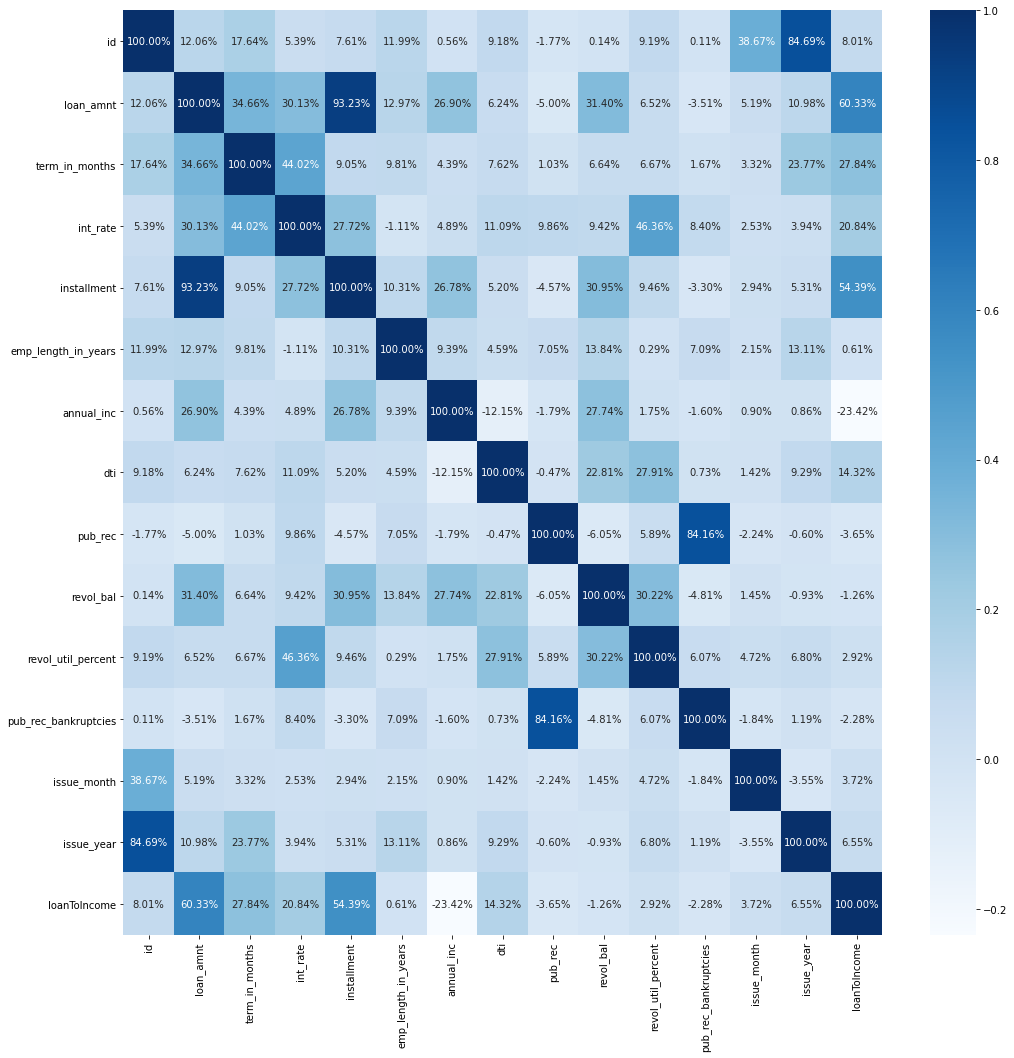

In [46]:
## Creating graph for correlation
corrData = lendDF.corr()

plt.figure(figsize=[17,17])
sns.heatmap(corrData, cmap="Blues", fmt='.2%', annot=True)
plt.show()


## Observation:
# 1. 'loan_amnt' has strong correlation with 'installment'.
# 2. 'term_in_months' has strong correlation with 'int_rate'.
# 3. 'int_rate' has strong correlation with 'revol_util_percent'.
# 4. 'pub_rec' has strong correlation with 'pub_rec_bankruptcies'.

### Univariate Analysis

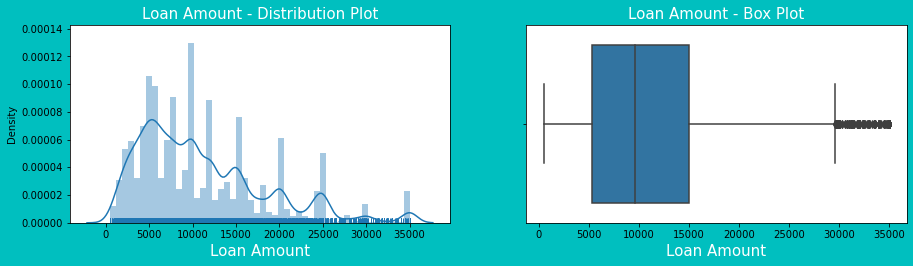

In [47]:
# Univariate Analysis on Loan amount-
## Loan Amount distribution and box plot - Quantitative Variable Analysis


plt.figure(figsize=(15,8),facecolor='c')

# subplot 1
plt.subplot(2, 2, 1)
loanAmountDistPlot = sns.distplot(lendDF['loan_amnt'], rug=True)
loanAmountDistPlot.set_title('Loan Amount - Distribution Plot',fontsize=15,color='w')
loanAmountDistPlot.set_xlabel('Loan Amount',fontsize=15,color='w')

# subplot 2
plt.subplot(2, 2, 2)
loanAmountBoxPlot = sns.boxplot(x=lendDF['loan_amnt'])
loanAmountBoxPlot.set_title('Loan Amount - Box Plot',fontsize=15,color='w')
loanAmountBoxPlot.set_xlabel('Loan Amount',fontsize=15,color='w')

plt.show()



# Observations: 
# As evident from the below box plot, maximum loans have been applied for amount between 5K - 15K.




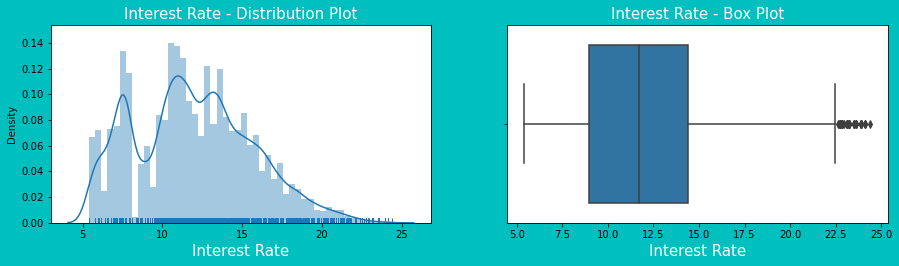

In [48]:
# Univariate Analysis on Interest rate-
## interest rate distribution and box plot - Quantitative Variable Analysis


plt.figure(figsize=(15,8),facecolor='c')

# subplot 1
plt.subplot(2, 2, 1)
intRateDistPlot = sns.distplot(lendDF['int_rate'], rug=True)
intRateDistPlot.set_title('Interest Rate - Distribution Plot',fontsize=15,color='w')
intRateDistPlot.set_xlabel('Interest Rate',fontsize=15,color='w')

# subplot 2
plt.subplot(2, 2, 2)
intRateBoxPlot = sns.boxplot(x=lendDF['int_rate'])
intRateBoxPlot.set_title('Interest Rate - Box Plot',fontsize=15,color='w')
intRateBoxPlot.set_xlabel('Interest Rate',fontsize=15,color='w')

plt.show()



# Observations: 
# As evident from the below box plot, maximum loans have interest rate between 9% - 14%. 
# Though there are quite a few interest rates which are on the higher end i.e. more than 20% to 25%.



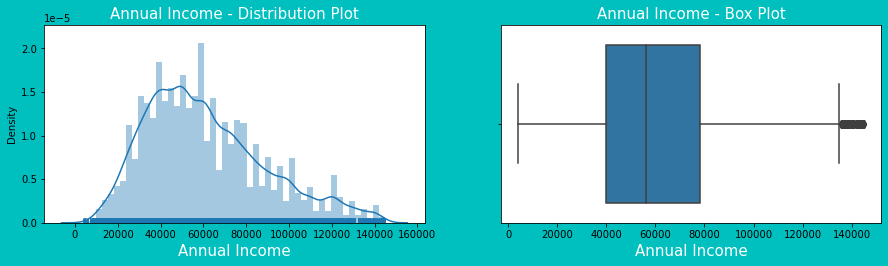

In [49]:
# Univariate Analysis on Annual Income-
## Annual Income distribution and box plot - Quantitative Variable Analysis

### Ignoring very high Annual income values (upper outlier value ~ 145000 calulated by using Q3 + 1.5 IQR)

plt.figure(figsize=(15,8),facecolor='c')

# subplot 1
plt.subplot(2, 2, 1)
annualIncomeDistPlot = sns.distplot(lendDF[(lendDF['annual_inc'] < 145000.0)]['annual_inc'], rug=True)
annualIncomeDistPlot.set_title('Annual Income - Distribution Plot',fontsize=15,color='w')
annualIncomeDistPlot.set_xlabel('Annual Income',fontsize=15,color='w')

# subplot 2
plt.subplot(2, 2, 2)
annualIncomeBoxPlot = sns.boxplot(x=lendDF[(lendDF['annual_inc'] < 145000.0)]['annual_inc'])
annualIncomeBoxPlot.set_title('Annual Income - Box Plot',fontsize=15,color='w')
annualIncomeBoxPlot.set_xlabel('Annual Income',fontsize=15,color='w')

plt.show()



# Observations: 
# As evident from the below box plot, maximum loans have been applied by the individuals 
# having annual income of 40K - 80K.



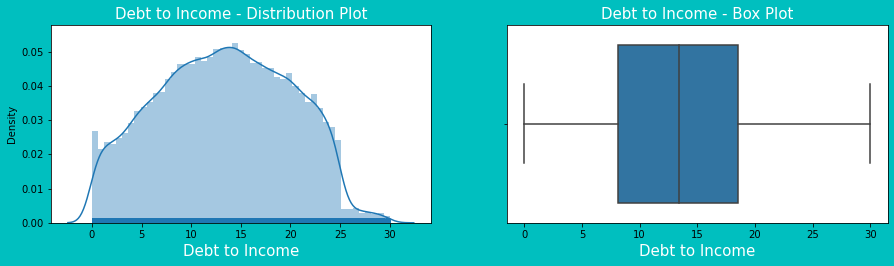

In [50]:
# Univariate Analysis on Debt to Income -
## Debt To Income distribution and box plot - Quantitative Variable Analysis


plt.figure(figsize=(15,8),facecolor='c')

# subplot 1
plt.subplot(2, 2, 1)
dtiDistPlot = sns.distplot(lendDF['dti'], rug=True)
dtiDistPlot.set_title('Debt to Income - Distribution Plot',fontsize=15,color='w')
dtiDistPlot.set_xlabel('Debt to Income',fontsize=15,color='w')

# subplot 2
plt.subplot(2, 2, 2)
dtiBoxPlot = sns.boxplot(x=lendDF['dti'])
dtiBoxPlot.set_title('Debt to Income - Box Plot',fontsize=15,color='w')
dtiBoxPlot.set_xlabel('Debt to Income',fontsize=15,color='w')

plt.show()



# Observations: 
# As evident from the below box plot, 
# maximum loans have been applied by individuals having debt to income ratio of 8-18%



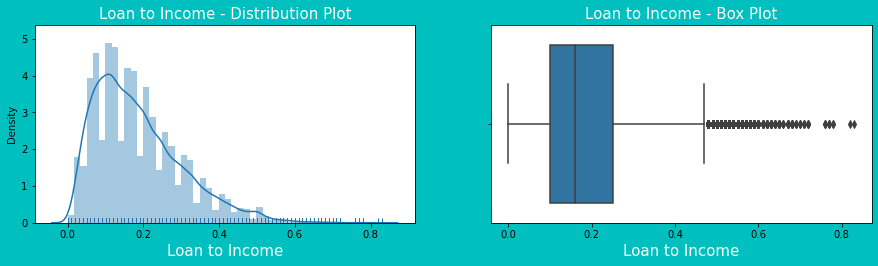

In [51]:
# Univariate Analysis on Loan to Income -
## Loan To Income distribution and box plot - Quantitative Variable Analysis


plt.figure(figsize=(15,8),facecolor='c')

# subplot 1
plt.subplot(2, 2, 1)
ltiDistPlot = sns.distplot(lendDF['loanToIncome'], rug=True)
ltiDistPlot.set_title('Loan to Income - Distribution Plot',fontsize=15,color='w')
ltiDistPlot.set_xlabel('Loan to Income',fontsize=15,color='w')

# subplot 2
plt.subplot(2, 2, 2)
ltiBoxPlot = sns.boxplot(x=lendDF['loanToIncome'])
ltiBoxPlot.set_title('Loan to Income - Box Plot',fontsize=15,color='w')
ltiBoxPlot.set_xlabel('Loan to Income',fontsize=15,color='w')

plt.show()



# Observations: 
# As evident from the below box plot, 
# maximum loans have been applied for loan value of 10%-25% of current annual income.


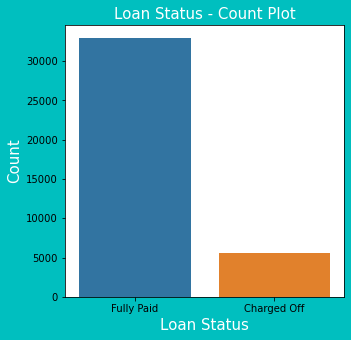

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [52]:
# Univariate Analysis on Loan Status
## Loan Status Count Plot - Unordered Categorical Variable Analysis

plt.figure(figsize=(5,5),facecolor='c')

loanStatusCountPlot = sns.countplot(x = 'loan_status', data=lendDF)
loanStatusCountPlot.set_title('Loan Status - Count Plot',fontsize=15,color='w')
loanStatusCountPlot.set_xlabel('Loan Status',fontsize=15,color='w')
loanStatusCountPlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()


lendDF['loan_status'].value_counts()


# Observation: 
# As checking from the below graph and data below, approximately 15% of total loans are charged off.


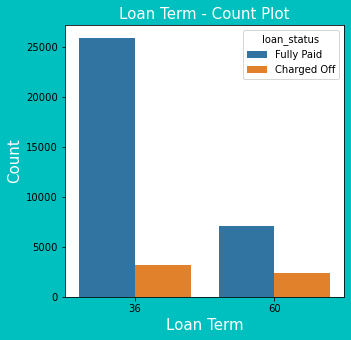

36    29096
60     9481
Name: term_in_months, dtype: int64

In [53]:
# Univariate Analysis on Loan Term -
## Loan Term Count Plot - Categorical Variable Analysis

plt.figure(figsize=(5,5),facecolor='c')

loanTermCountPlot = sns.countplot(x = 'term_in_months', data=lendDF, hue='loan_status')
loanTermCountPlot.set_title('Loan Term - Count Plot',fontsize=15,color='w')
loanTermCountPlot.set_xlabel('Loan Term',fontsize=15,color='w')
loanTermCountPlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()


lendDF['term_in_months'].value_counts()


# Observation: 
# As checking from the below graph and data below, 
# approximately 25% of total loans are applied for the term of 36 months.

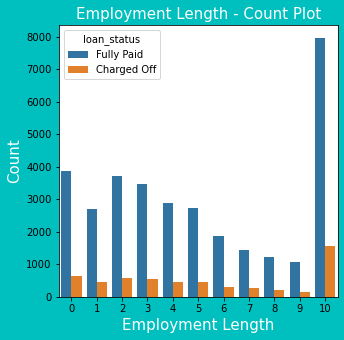

10    9521
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length_in_years, dtype: int64

In [54]:
# Univariate Analysis on Employment Length -
## Employment Length Count Plot - Categorical Variable Analysis

plt.figure(figsize=(5,5),facecolor='c')

empTermCountPlot = sns.countplot(x = 'emp_length_in_years', data=lendDF, hue='loan_status')
empTermCountPlot.set_title('Employment Length - Count Plot',fontsize=15,color='w')
empTermCountPlot.set_xlabel('Employment Length',fontsize=15,color='w')
empTermCountPlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()


lendDF['emp_length_in_years'].value_counts()


# Observation: 
# As checking from the below graph and data below, 
# most of the loans have been applied for individuals having employment over 10 or more years. 
# Also, individuals employed for 0, 2 and 3 years have similar loan counts.


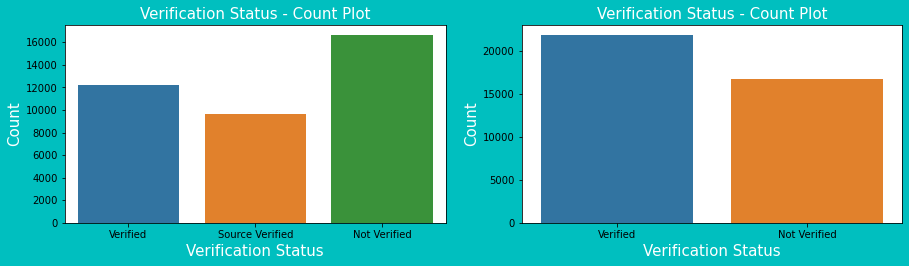

In [55]:
# Univariate Analysis on Verification Status-
## Verification Status Count Plot - Categorical Variable Analysis

plt.figure(figsize=(15,8),facecolor='c')

# subplot 1
plt.subplot(2, 2, 1)
verificationStatusCountPlot = sns.countplot(x = 'verification_status', data=lendDF)
verificationStatusCountPlot.set_title('Verification Status - Count Plot',fontsize=15,color='w')
verificationStatusCountPlot.set_xlabel('Verification Status',fontsize=15,color='w')
verificationStatusCountPlot.set_ylabel('Count',fontsize=15,color='w')


# combining "Verified" and "Source Verified" status into 1.
verifiedStautsDF = lendDF['verification_status'].apply(lambda x :'Verified' if 
                                        (x=='Verified' or x == 'Source Verified')  else 'Not Verified')

# subplot 2
plt.subplot(2, 2, 2)
verificationStatusCountPlot = sns.countplot(x = verifiedStautsDF, data= verifiedStautsDF)
verificationStatusCountPlot.set_title('Verification Status - Count Plot',fontsize=15,color='w')
verificationStatusCountPlot.set_xlabel('Verification Status',fontsize=15,color='w')
verificationStatusCountPlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()


# Observation: 
# As checking from the below graph and data below, most of the loans have been applied for individuals 
# without the verification (considering Verified and Source_Verified as different status).
# However if we combine Source Verified and Verified status, maximum loans have been provided to verified individuals.
# We can safely assume that Source Verified and Verified status to be same as Verified for all practical purposes.


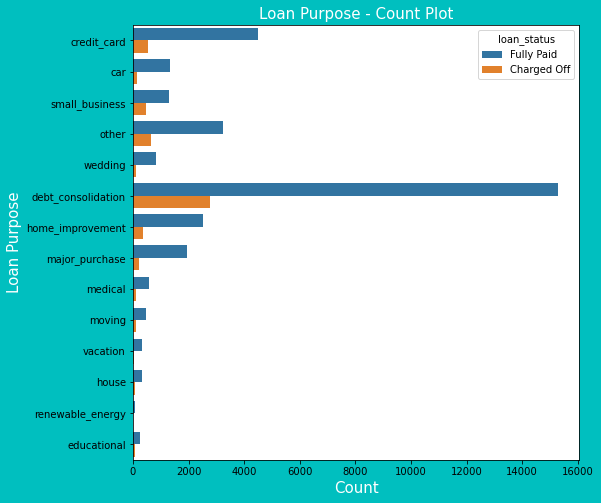

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [56]:
# Univariate Analysis on Purpose -
## Purpose Count Plot - Categorical Variable Analysis

plt.figure(figsize=(8,8),facecolor='c')

purposeCountPlot = sns.countplot(y = 'purpose', data=lendDF, hue='loan_status')
purposeCountPlot.set_title('Loan Purpose - Count Plot',fontsize=15,color='w')
purposeCountPlot.set_ylabel('Loan Purpose',fontsize=15,color='w')
purposeCountPlot.set_xlabel('Count',fontsize=15,color='w')

plt.show()


lendDF['purpose'].value_counts()


# Observation: 
# As checking from the below graph and data below, 
# most of the loans have been applied for debt consolidation (approx 40% of total loan), 
# followed by credit card, others and home improvement.



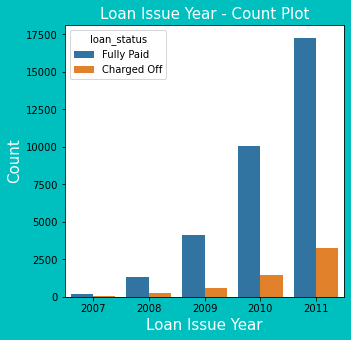

2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: issue_year, dtype: int64

In [57]:
# Univariate Analysis on Loan Issue year -
## Loan Issue year Count Plot - Categorical Variable Analysis

plt.figure(figsize=(5,5),facecolor='c')

issueYearCountPlot = sns.countplot(x = 'issue_year', data=lendDF, hue='loan_status')
issueYearCountPlot.set_title('Loan Issue Year - Count Plot',fontsize=15,color='w')
issueYearCountPlot.set_xlabel('Loan Issue Year',fontsize=15,color='w')
issueYearCountPlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()


lendDF['issue_year'].value_counts()


# Observation: 
# As checking from the below graph and data below, most of the loans have been applied in the year 2011. 
# It appears to be an exponential year to year growth from 2007 to 2011.



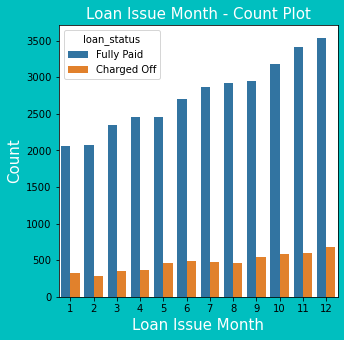

12    4215
11    4006
10    3761
9     3498
8     3388
7     3351
6     3180
5     2919
4     2831
3     2691
1     2379
2     2358
Name: issue_month, dtype: int64

In [58]:
# Univariate Analysis on Loan Issue Month -
## Loan Issue Month Count Plot - Ordered Categorical Variable Analysis

plt.figure(figsize=(5,5),facecolor='c')

issueYearCountPlot = sns.countplot(x = 'issue_month', data=lendDF, hue='loan_status')
issueYearCountPlot.set_title('Loan Issue Month - Count Plot',fontsize=15,color='w')
issueYearCountPlot.set_xlabel('Loan Issue Month',fontsize=15,color='w')
issueYearCountPlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()


lendDF['issue_month'].value_counts()


### Observation: 
# As checking from the below graph and data below, most of the loans have been applied in the month of December.
# It appears to be a trend of increaing in loan application as the months passes.


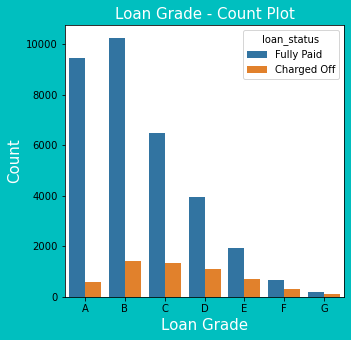

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [59]:
# Univariate Analysis on Grade -
## Grade Count Plot - Categorical Variable Analysis

plt.figure(figsize=(5,5),facecolor='c')

gradeCountPlot = sns.countplot(x = 'grade', data=lendDF, hue='loan_status', order = 'ABCDEFG')
gradeCountPlot.set_title('Loan Grade - Count Plot',fontsize=15,color='w')
gradeCountPlot.set_xlabel('Loan Grade',fontsize=15,color='w')
gradeCountPlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()


lendDF['grade'].value_counts()


### Observation: 
# As checking from the below graph and data below, 
# the loans issued have been decreasing with the decrease in grade except for grade A and grade B.
# Very less percent of loans have been issued for grade G.


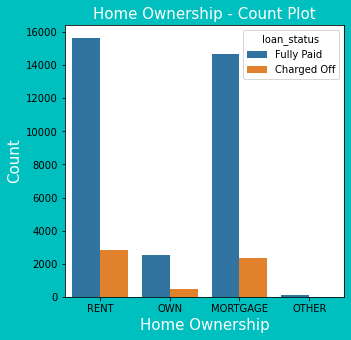

home_ownership  loan_status
RENT            Fully Paid     15641
MORTGAGE        Fully Paid     14694
RENT            Charged Off     2839
OWN             Fully Paid      2532
MORTGAGE        Charged Off     2327
OWN             Charged Off      443
OTHER           Fully Paid        80
                Charged Off       18
dtype: int64

In [60]:
# Univariate Analysis on Home Ownership -
## Home Ownership Count Plot - Categorical Variable Analysis

## 'home_ownership' has just 3 rows for 'NONE'. Ignoring 3 NONE - home ownership type
homeOwnershipDF = lendDF[~(lendDF['home_ownership'] == 'NONE')][['home_ownership', 'loan_status']]

plt.figure(figsize=(5,5),facecolor='c')

homeOwnCountPlot = sns.countplot(x = 'home_ownership', data=homeOwnershipDF, hue='loan_status')
homeOwnCountPlot.set_title('Home Ownership - Count Plot',fontsize=15,color='w')
homeOwnCountPlot.set_xlabel('Home Ownership',fontsize=15,color='w')
homeOwnCountPlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()


homeOwnershipDF.value_counts()


# Observation: 
# As checking from the below graph and data, RENT and MORTGAGE Ownership type accounts for approx 90% of all loans.


### Bivariate Analysis

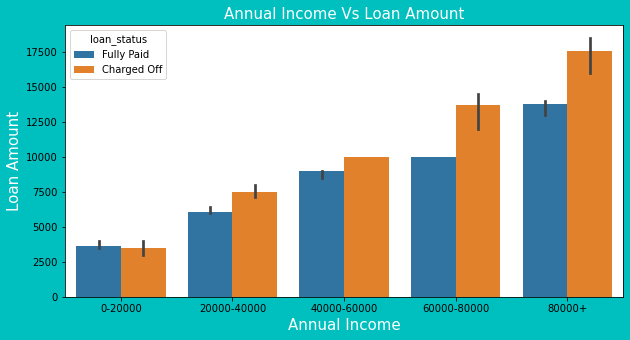

In [61]:
## Bivariate Analysis - Annual Income Category and Loan Amount

plt.figure(figsize=(10,5),facecolor='c')

plot = sns.barplot(y='loan_amnt', x = 'annualIncomeCategory', hue = 'loan_status', data= lendDF, estimator=np.median)
plot.set_title('Annual Income Vs Loan Amount',fontsize=15,color='w')
plot.set_xlabel('Annual Income',fontsize=15,color='w')
plot.set_ylabel('Loan Amount',fontsize=15,color='w')

plt.show()


## Observation: 
## The loan are getting charged off for more loan amount in the same income category group.
## That means that within the same income category group, individuals who have taken more loan runs a risk to default.


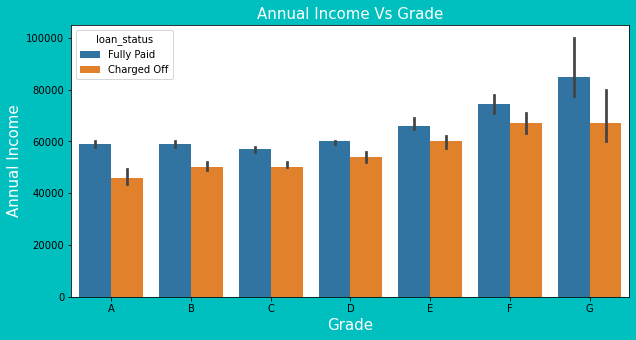

In [62]:
## Bivariate Analysis - Annual Income and Grade

plt.figure(figsize=(10,5),facecolor='c')

plot = sns.barplot(x='grade', y = 'annual_inc', hue = 'loan_status', data= lendDF, estimator=np.median, order='ABCDEFG')
plot.set_title('Annual Income Vs Grade',fontsize=15,color='w')
plot.set_ylabel('Annual Income',fontsize=15,color='w')
plot.set_xlabel('Grade',fontsize=15,color='w')

plt.show()


## Observation: 
## In the same Grade, the loans getting charged Off belongs to individual who have less annual income.


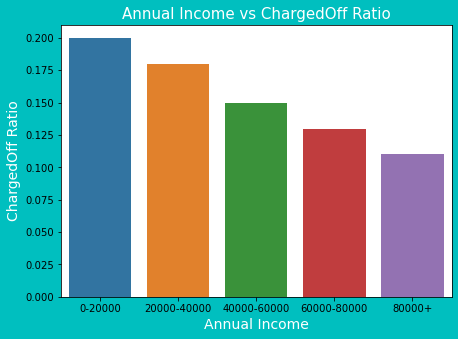

In [63]:
## Bivariate Analysis - Annual Income Category And ChargeOff Ratio

annualIncomeDF = lendDF.groupby(['annualIncomeCategory', 'loan_status']).loan_status.count().unstack().reset_index()
annualIncomeDF['Total'] = annualIncomeDF['Charged Off'] + annualIncomeDF['Fully Paid'] 
annualIncomeDF['ChargedOff_Ratio'] = round(annualIncomeDF['Charged Off'] / annualIncomeDF['Total'], 2)
annualIncomeDF.sort_values('ChargedOff_Ratio', ascending=False)


plt.figure(figsize=(7,5),facecolor='c')

plot=sns.barplot(x='annualIncomeCategory', y='ChargedOff_Ratio', data=annualIncomeDF)
plot.set_title('Annual Income vs ChargedOff Ratio',fontsize=15,color = 'w')
plot.set_ylabel('ChargedOff Ratio',fontsize=14,color = 'w')
plot.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

# Observations:
# 1. Annual Income of 80000+ has least Charged Off ratio i.e. least risk of loan getting charged off.
# 2. Annual Income of less than 20000 has most Charged Off ratio i.e. highest risk of loan getting charged off.
# 3. With increase in annual income, risk of loan getting Charged off is reducing.

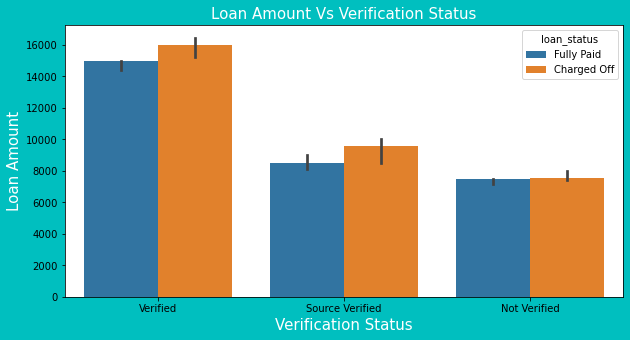

In [64]:
## Bivariate Analysis -  Loan Amount and Verification Status

plt.figure(figsize=(10,5),facecolor='c')

plot = sns.barplot(y='loan_amnt', x = 'verification_status', hue = 'loan_status', data= lendDF, estimator= np.median)
plot.set_title('Loan Amount Vs Verification Status',fontsize=15,color='w')
plot.set_ylabel('Loan Amount',fontsize=15,color='w')
plot.set_xlabel('Verification Status',fontsize=15,color='w')

plt.show()


## Observation: 
## The individuals who have been verified have chances of getting higher loan amount. 
## Also, the chargeoff loans have higher loan amount compared to fully Paid loans. 


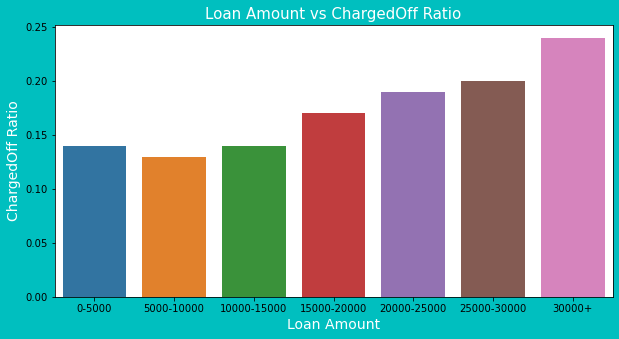

In [65]:
## Bivariate Analysis - Loan Amount Category And Loan ChargeOff Ratio

loanAmountDF = lendDF.groupby(['loanAmountCategory', 'loan_status']).loan_status.count().unstack().reset_index()
loanAmountDF['Total'] = loanAmountDF['Charged Off'] + loanAmountDF['Fully Paid'] 
loanAmountDF['ChargedOff_Ratio'] = round(loanAmountDF['Charged Off'] / loanAmountDF['Total'], 2)
loanAmountDF.sort_values('ChargedOff_Ratio', ascending=False)


plt.figure(figsize=(10,5),facecolor='c')

plot=sns.barplot(x='loanAmountCategory', y='ChargedOff_Ratio', data=loanAmountDF)
plot.set_title('Loan Amount vs ChargedOff Ratio',fontsize=15,color = 'w')
plot.set_ylabel('ChargedOff Ratio',fontsize=14,color = 'w')
plot.set_xlabel('Loan Amount',fontsize=14,color='w')
plt.show()

# Observations:
# 1. Loan Amount of 30000+ has most Charged Off ratio i.e. highest risk of loan getting charged off.
# 2. Loan Amount of less than 15000 has less Charged Off ratio i.e. lower risk of loan getting charged off.
# 3. With increase in loan amount (esp. above 15000), risk of loan getting Charged off is increasing.

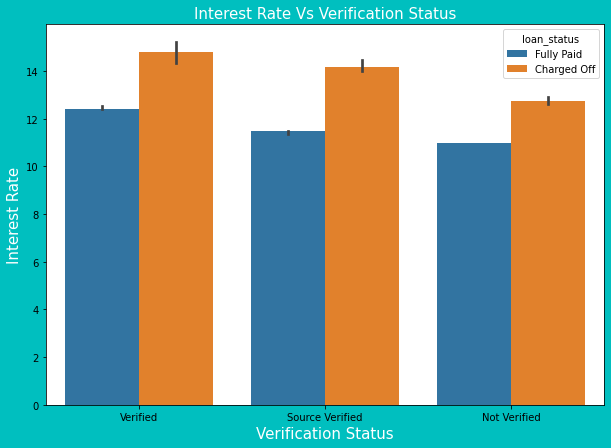

In [66]:
## Bivariate Analysis - verification Status and Interest rate

plt.figure(figsize=(10,7),facecolor='c')

plot = sns.barplot(y='int_rate', x = 'verification_status', hue = 'loan_status', data= lendDF, estimator= np.median)
plot.set_title('Interest Rate Vs Verification Status',fontsize=15,color='w')
plot.set_ylabel('Interest Rate',fontsize=15,color='w')
plot.set_xlabel('Verification Status',fontsize=15,color='w')

plt.show()


## Observation: The chargeoff loans have higher interest rate 
## compared to fully Paid loans irrespective of verification status.


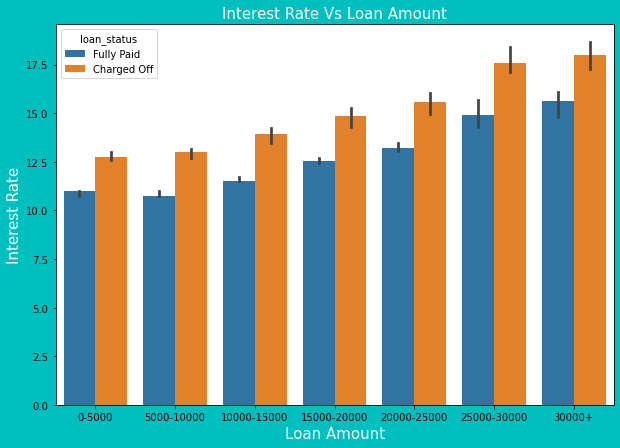

In [67]:
## Bivariate Analysis - Loan Amount Category and Interest rate

plt.figure(figsize=(10,7),facecolor='c')

plot = sns.barplot(y='int_rate', x = 'loanAmountCategory', hue = 'loan_status', data= lendDF, estimator= np.median)
plot.set_title('Interest Rate Vs Loan Amount',fontsize=15,color='w')
plot.set_ylabel('Interest Rate',fontsize=15,color='w')
plot.set_xlabel('Loan Amount',fontsize=15,color='w')

plt.show()


## Observation: As the loan amount increases, the interest rates charged also increases.
## The charged off loans also increases with increase in Loan amount and interest rates.


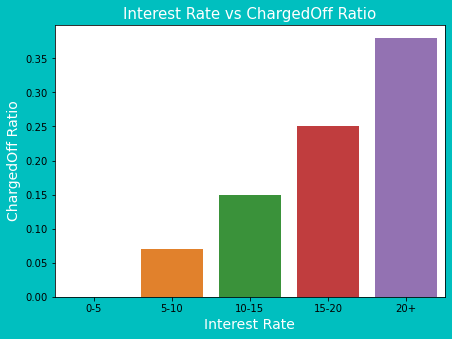

In [68]:
## Bivariate Analysis - Interest rate Category and ChargeOff Ratio

intRateDF = lendDF.groupby(['intRateCategory', 'loan_status']).loan_status.count().unstack().reset_index()
intRateDF['Total'] = intRateDF['Charged Off'] + intRateDF['Fully Paid'] 
intRateDF['ChargedOff_Ratio'] = round(intRateDF['Charged Off'] / intRateDF['Total'], 2)
intRateDF.sort_values('ChargedOff_Ratio', ascending=False)

plt.figure(figsize=(7,5),facecolor='c')

plot=sns.barplot(x='intRateCategory', y='ChargedOff_Ratio', data=intRateDF)
plot.set_title('Interest Rate vs ChargedOff Ratio',fontsize=15,color = 'w')
plot.set_ylabel('ChargedOff Ratio',fontsize=14,color = 'w')
plot.set_xlabel('Interest Rate',fontsize=14,color='w')
plt.show()

# Observations:
# 1. Interest rate of 20+ has most Charged Off ratio i.e. highest risk of loan getting charged off.
# 2. Interest rate of less than 10 has least Charged Off ratio i.e. lowest risk of loan getting charged off.
# 3. With increase in interest rate, risk of loan getting Charged off is increasing.

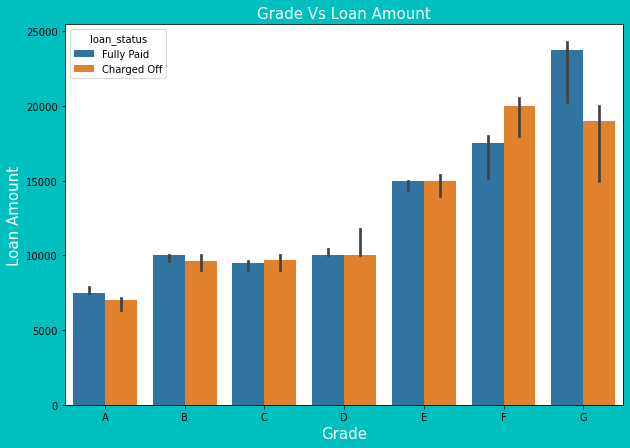

In [69]:
## Bivariate Analysis - Loan Amount and Grade

plt.figure(figsize=(10,7),facecolor='c')

plot = sns.barplot(y='loan_amnt', x = 'grade', hue = 'loan_status', data= lendDF, estimator= np.median, order = 'ABCDEFG')
plot.set_title('Grade Vs Loan Amount',fontsize=15,color='w')
plot.set_ylabel('Loan Amount',fontsize=15,color='w')
plot.set_xlabel('Grade',fontsize=15,color='w')

plt.show()


## Observation: It seems that the Grades are assigned based on Loan Amount.
## Greater the loan Amount, worse the grade.
## Also, the tendency of loan getting charged off increases with bad grades.


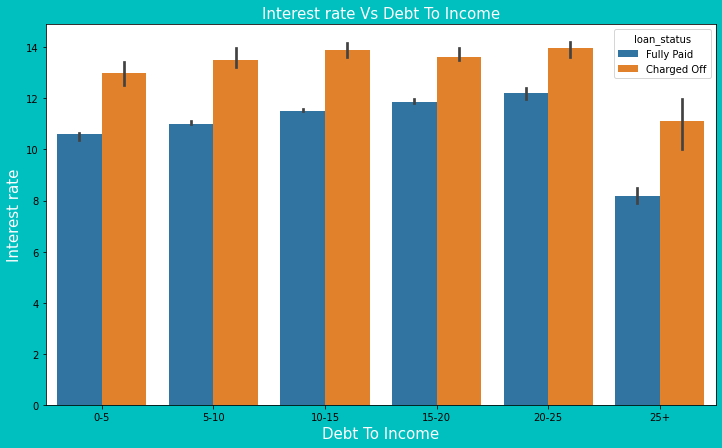

In [70]:
## Bivariate Analysis - Debt to Income Category and Interest Rate

plt.figure(figsize=(12,7),facecolor='c')

plot = sns.barplot(y='int_rate', x = 'dtiCategory', hue = 'loan_status', data= lendDF, estimator= np.median)
plot.set_title('Interest rate Vs Debt To Income',fontsize=15,color='w')
plot.set_ylabel('Interest rate',fontsize=15,color='w')
plot.set_xlabel('Debt To Income',fontsize=15,color='w')

plt.show()


## Observation: There is an increasing trend of interest rate as DTI increases,
## with an exception of 25+ DTI category where the interest rate falls sharply.


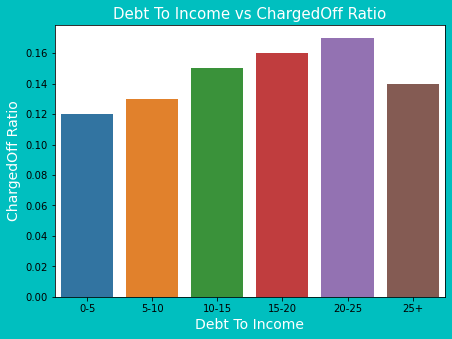

In [71]:
## Bivariate Analysis - Debt To Income Category And Loan Charge Off Ratio

dtiDF = lendDF.groupby(['dtiCategory', 'loan_status']).loan_status.count().unstack().reset_index()
dtiDF['Total'] = dtiDF['Charged Off'] + dtiDF['Fully Paid'] 
dtiDF['ChargedOff_Ratio'] = round(dtiDF['Charged Off'] / dtiDF['Total'], 2)
dtiDF.sort_values('ChargedOff_Ratio', ascending=False)

plt.figure(figsize=(7,5),facecolor='c')

plot=sns.barplot(x='dtiCategory', y='ChargedOff_Ratio', data=dtiDF)
plot.set_title('Debt To Income vs ChargedOff Ratio',fontsize=15,color = 'w')
plot.set_ylabel('ChargedOff Ratio',fontsize=14,color = 'w')
plot.set_xlabel('Debt To Income',fontsize=14,color='w')
plt.show()

# Observations:
# 1. Debt to income ratio of 20-25 has most Charged Off ratio i.e. highest risk of loan getting charged off.
# 2. Debt to income ratio below 5 has least Charged Off ratio i.e. lowest risk of loan getting charged off.
# 3. With increase in debt to income ratio, risk of loan getting Charged off is increasing. However, dti ratio of 25+ 
#    is witnessing decrease in chargeoff ratio.

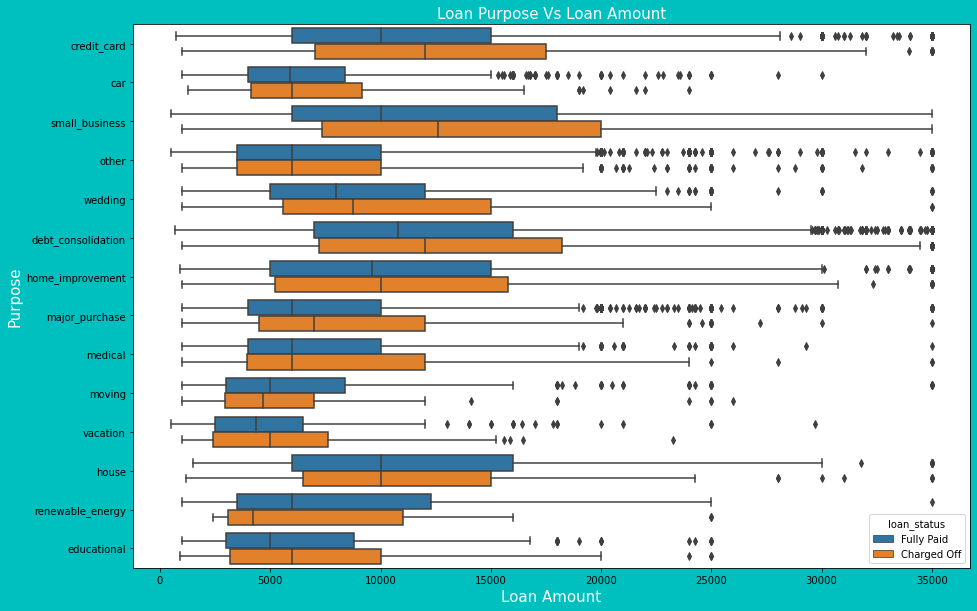

In [72]:
## Bivariate Analysis - Loan Purpose and Loan Amount

plt.figure(figsize=(15,10),facecolor='c')

plot = sns.boxplot(y='purpose', data= lendDF, x = 'loan_amnt', hue='loan_status')
plot.set_title('Loan Purpose Vs Loan Amount',fontsize=15,color='w')
plot.set_xlabel('Loan Amount',fontsize=15,color='w')
plot.set_ylabel('Purpose',fontsize=15,color='w')

plt.show()


## Observation: Most of the chargedOff loans are Small Business. In other words, we can say that
## lending to small business carries greater risk, followed by 'Debt Consolidation' and Credit Card.


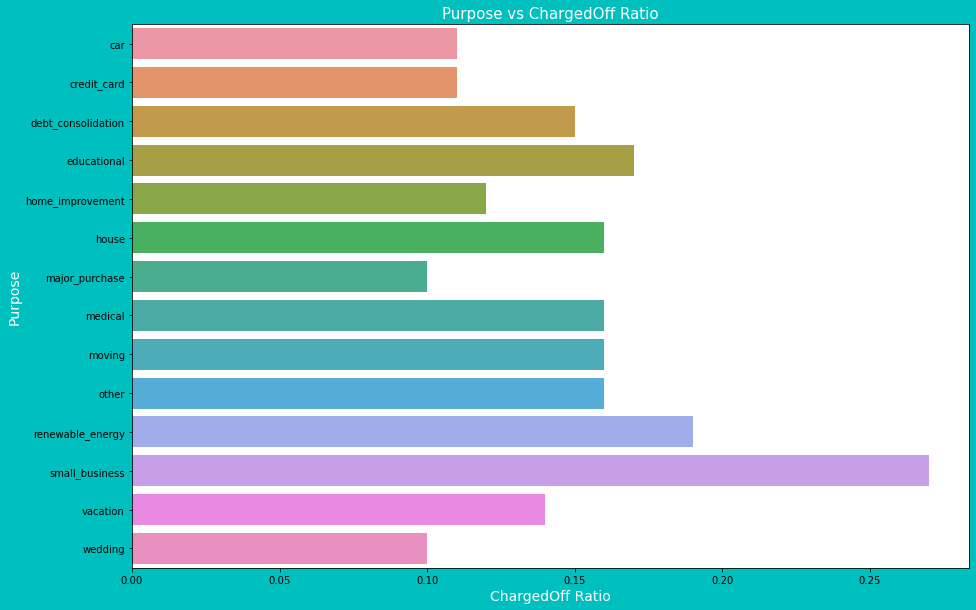

In [73]:
## Bivariate Analysis - Purpose And Chareg off Ratio

purposeDF = lendDF.groupby(['purpose', 'loan_status']).loan_status.count().unstack().reset_index()
purposeDF['Total'] = purposeDF['Charged Off'] + purposeDF['Fully Paid'] 
purposeDF['ChargedOff_Ratio'] = round(purposeDF['Charged Off'] / purposeDF['Total'], 2)
purposeDF.sort_values('ChargedOff_Ratio', ascending=False)


plt.figure(figsize=(15,10),facecolor='c')

plot=sns.barplot(y='purpose', x='ChargedOff_Ratio', data=purposeDF)
plot.set_title('Purpose vs ChargedOff Ratio',fontsize=15,color = 'w')
plot.set_xlabel('ChargedOff Ratio',fontsize=14,color = 'w')
plot.set_ylabel('Purpose',fontsize=14,color='w')
plt.show()

# Observations:
# 1. Small Business - loan purpose has very high charge off ratio compared to other purpose. 
# Small Business carries a significant amount of high Charge Off risk.
# renewable_energy and education also has high charge off ratios.

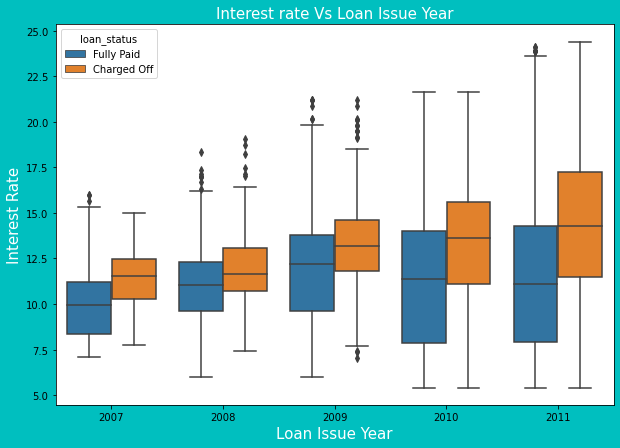

In [74]:
## Bivariate Analysis - Interest Rate and Loan Issue year

plt.figure(figsize=(10,7),facecolor='c')

plot = sns.boxplot(y='int_rate', x = 'issue_year', hue = 'loan_status', data= lendDF)
plot.set_title('Interest rate Vs Loan Issue Year',fontsize=15,color='w')
plot.set_ylabel('Interest Rate',fontsize=15,color='w')
plot.set_xlabel('Loan Issue Year',fontsize=15,color='w')

plt.show()


## Observation: The interest rate have been slowly increasing over the years.
## Also, the variance in the interest rate ia also increasing over the years.


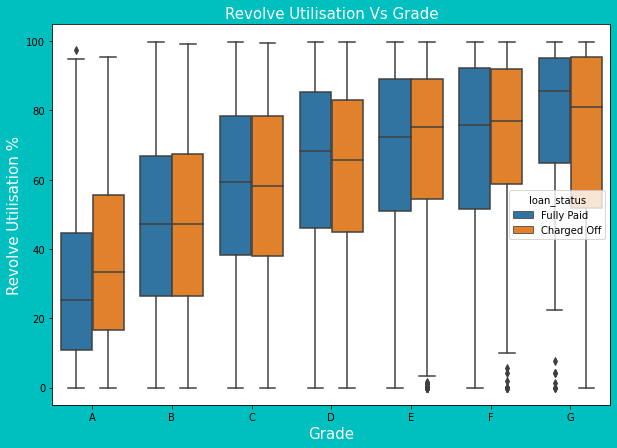

In [75]:
## Bivariate Analysis - Revolve Utilisation Vs Grade

plt.figure(figsize=(10,7),facecolor='c')

plot = sns.boxplot(y='revol_util_percent', x = 'grade', hue = 'loan_status', data= lendDF, order = 'ABCDEFG')
plot.set_title('Revolve Utilisation Vs Grade',fontsize=15,color='w')
plot.set_xlabel('Grade',fontsize=15,color='w')
plot.set_ylabel('Revolve Utilisation %',fontsize=15,color='w')

plt.show()


## Observation: The revolve utilisation is increasing as the Grade of the loan is worsening.


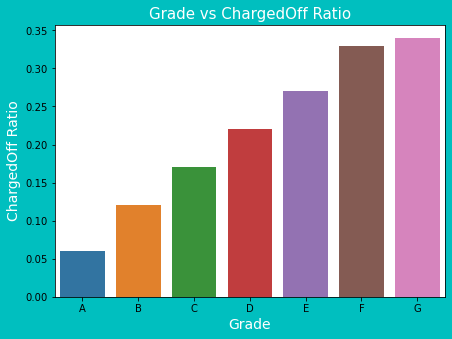

In [76]:
## Bivariate Analysis - Grades and Charge Off Ratio

gradeDF = lendDF.groupby(['grade', 'loan_status']).loan_status.count().unstack().reset_index()
gradeDF['Total'] = gradeDF['Charged Off'] + gradeDF['Fully Paid'] 
gradeDF['ChargedOff_Ratio'] = round(gradeDF['Charged Off'] / gradeDF['Total'], 2)
gradeDF.sort_values('ChargedOff_Ratio', ascending=False)


plt.figure(figsize=(7,5),facecolor='c')

plot=sns.barplot(x='grade', y='ChargedOff_Ratio', data=gradeDF)
plot.set_title('Grade vs ChargedOff Ratio',fontsize=15,color = 'w')
plot.set_ylabel('ChargedOff Ratio',fontsize=14,color = 'w')
plot.set_xlabel('Grade',fontsize=14,color='w')
plt.show()

# Observations:
# 1. "G" grade has most Charged Off ratio i.e. highest risk of loan getting charged off.
# 2. Grade "A" loans has least Charged Off ratio i.e. lowest risk of loan getting charged off.
# 3. With worsening of Grades of loan, risk of loan getting Charged off is increasing.

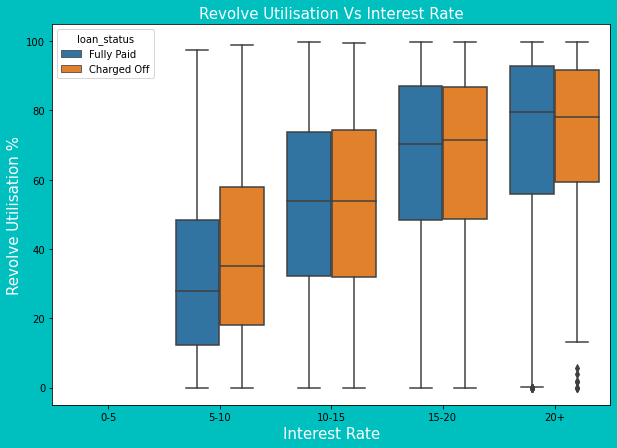

In [77]:
## Bivariate Analysis - Revolve Utilisation Vs Interest Rate

plt.figure(figsize=(10,7),facecolor='c')

plot = sns.boxplot(y='revol_util_percent', x = 'intRateCategory', hue = 'loan_status', data= lendDF)
plot.set_title('Revolve Utilisation Vs Interest Rate',fontsize=15,color='w')
plot.set_xlabel('Interest Rate',fontsize=15,color='w')
plot.set_ylabel('Revolve Utilisation %',fontsize=15,color='w')

plt.show()


## Observation: The interest rate is high for high revolve utilization.


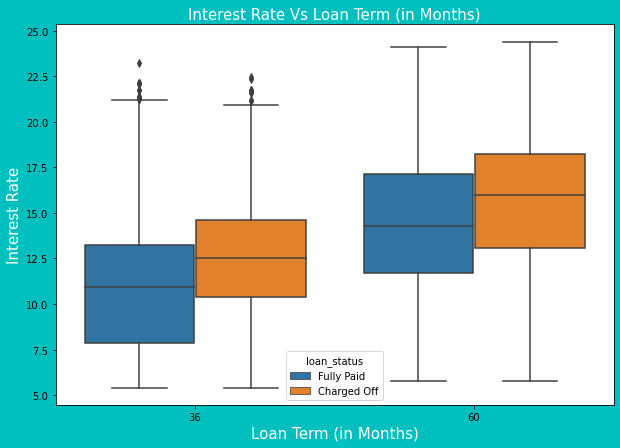

In [78]:
## Bivariate Analysis - Interest Rate Vs Loan Term

plt.figure(figsize=(10,7),facecolor='c')

plot = sns.boxplot(y='int_rate', x = 'term_in_months', hue = 'loan_status', data= lendDF)
plot.set_title('Interest Rate Vs Loan Term (in Months)',fontsize=15,color='w')
plot.set_xlabel('Loan Term (in Months)',fontsize=15,color='w')
plot.set_ylabel('Interest Rate',fontsize=15,color='w')

plt.show()


## Observation: Higher interest rates are charged for loans with longer term.


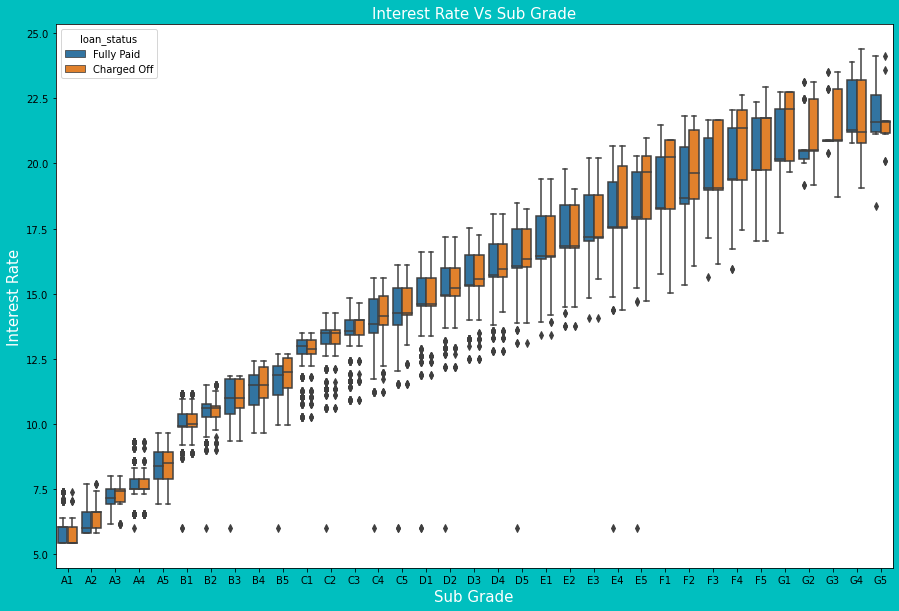

In [79]:
## Bivariate Analysis - Interest Rate Vs Sub Grades

plt.figure(figsize=(15,10),facecolor='c')
orderby = ['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5',
          'E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5']


plot = sns.boxplot(y='int_rate', x = 'sub_grade', hue = 'loan_status', data= lendDF, order = orderby)
plot.set_title('Interest Rate Vs Sub Grade',fontsize=15,color='w')
plot.set_xlabel('Sub Grade',fontsize=15,color='w')
plot.set_ylabel('Interest Rate',fontsize=15,color='w')

plt.show()


## Observation: There is a steep rise in interest rates as the subGrades worsens. 
## i.e. worse subgrade attracts more interest rates.


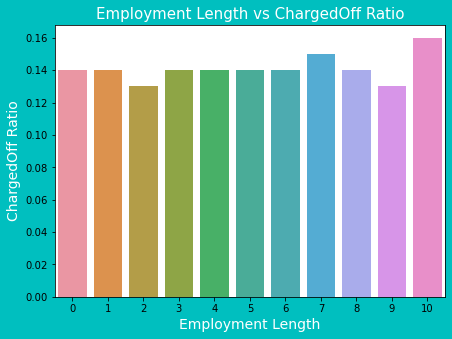

In [80]:
## Bivariate Analysis - Employment length And Charge Off Ratio

empLengthDF = lendDF.groupby(['emp_length_in_years', 'loan_status']).loan_status.count().unstack().reset_index()
empLengthDF['Total'] = empLengthDF['Charged Off'] + empLengthDF['Fully Paid'] 
empLengthDF['ChargedOff_Ratio'] = round(empLengthDF['Charged Off'] / empLengthDF['Total'], 2)
empLengthDF.sort_values('ChargedOff_Ratio', ascending=False)


plt.figure(figsize=(7,5),facecolor='c')

plot=sns.barplot(x='emp_length_in_years', y='ChargedOff_Ratio', data=empLengthDF)
plot.set_title('Employment Length vs ChargedOff Ratio',fontsize=15,color = 'w')
plot.set_ylabel('ChargedOff Ratio',fontsize=14,color = 'w')
plot.set_xlabel('Employment Length',fontsize=14,color='w')
plt.show()

# Observations:
# There is no emerging trend from this graph. 
# It seems employment length may not be an influencing factor in loan decisioning.

### Multivariate Analysis - PairPlots

In [81]:
pairDF = lendDF[['loan_amnt', 'int_rate', 'annual_inc', 'issue_year', 'loan_status']]

# Converting to log scale as data is highly skewed.
pairDF['loan_amnt'] = np.log10(pairDF['loan_amnt'])
pairDF['int_rate'] = np.log10(pairDF['int_rate'])
pairDF['annual_inc'] = np.log10(pairDF['annual_inc'])


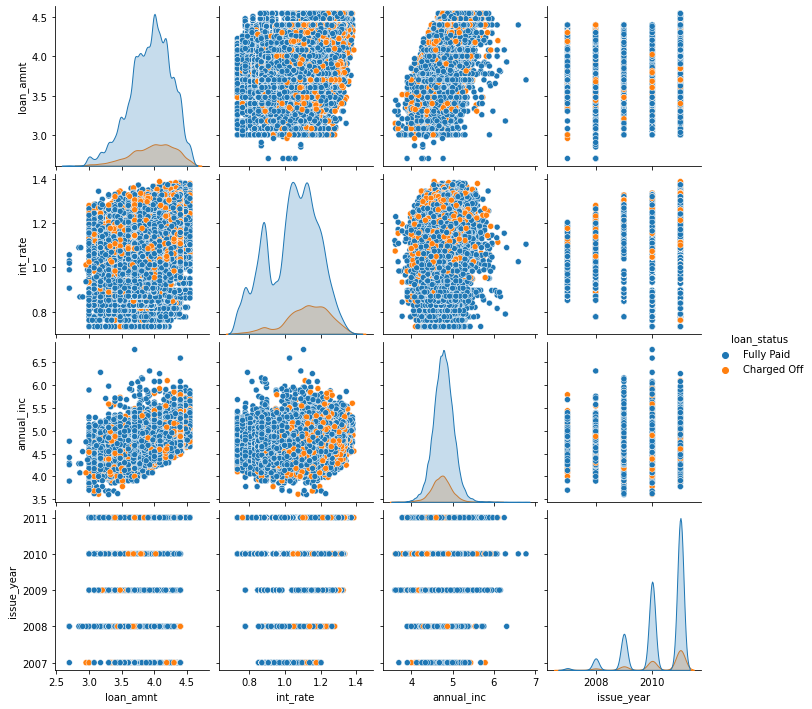

In [82]:
## Create a pair plot for 'loan_amnt', 'int_rate', 'annual_inc' and 'issue_year' to view their spread and behavior

sns.pairplot(pairDF, hue='loan_status')
plt.show()


# Observations:

# 1. The loan amount is showing tendecy to increase with increase in annual income.
# 2. The loans having higher loan amount or higher interest rates have greater tendency to be defaulted.
# 3. There is exponential increase in loan aplications year on year.

## Conclusion
Based on the above EDA of the loan dataset, we can identify few drivers for the loan approval process.

Driving Factors for loan getting default:

1. Higher Loan Amount (> $30000)

2. Higher interest rate (> 20%)

3. Loan Purpose ( Small Business, Renewable Energy, Education)

4. Higher Revolve Utilization rate (> 75%)

5. Bad Loan Grades (F, G)

6. Lower Annual Income (< $20000)

7. Higher Debt To Income ratio (20% - 25%)

